## Install xgboost package

In [1]:
# pip install xgboost

## Import libraries 

In [2]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_auc_score,roc_curve


import matplotlib.pyplot as plt 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5


## Load Data
https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

In [3]:
dataset = pd.read_csv('pima-indians-diabetes.csv', header = None)
dataset.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Diabetes']

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print ("Dataset size -->", dataset.shape[0])
print ("Number Of features -->", dataset.shape[1]-1)
display(dataset.Diabetes.value_counts())

Dataset size --> 768
Number Of features --> 8


0    500
1    268
Name: Diabetes, dtype: int64

## Prepare dataset

In [7]:
X = dataset.drop(columns = ['Diabetes'])    
Y = dataset['Diabetes']

## split data into train and test sets


In [8]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


## fit model no training data
https://xgboost.readthedocs.io/en/latest/parameter.html <br>
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ <br>
https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/



In [17]:
model = XGBClassifier(max_depth=10)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Grid Search
HP1 -> [1,2,3]
HP2 -> [1,2]
HM2 -> [4,5]

[HP1,HP2,HP3] => 3*2*2 = 12


Random Search 
[HP1, HP2, HP3] ==> 5



Bayesian Approach (Augur) -> 
[Hp1,Hp2, Hp3] --> [Hp1,Hp2, Hp3] ---> [Hp1,Hp2,Hp3]

In [18]:
results_train = X_train.copy()
results_train['target'] = y_train
results_train['pred_prob'] = model.predict_proba(X_train)[:,1]
results_train['pred_class'] = model.predict(X_train)
results_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target,pred_prob,pred_class
741,3,102,44,20,94,30.8,0.400,26,0,0.070139,0
534,1,77,56,30,56,33.3,1.251,24,0,0.022741,0
248,9,124,70,33,402,35.4,0.282,34,0,0.087494,0
249,1,111,86,19,0,30.1,0.143,23,0,0.005666,0
624,2,108,64,0,0,30.8,0.158,21,0,0.044607,0


## Make Predictions with XGBoost Model

In [19]:
results_test = X_test.copy()
results_test['target'] = y_test
results_test['pred_prob'] = model.predict_proba(X_test)[:,1]
results_test['pred_class'] = model.predict(X_test)
results_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target,pred_prob,pred_class
353,1,90,62,12,43,27.2,0.580,24,0,0.005535,0
236,7,181,84,21,192,35.9,0.586,51,1,0.983594,1
323,13,152,90,33,29,26.8,0.731,43,1,0.640144,1
98,6,93,50,30,64,28.7,0.356,23,0,0.007672,0
701,6,125,78,31,0,27.6,0.565,49,1,0.872706,1


## evaluate predictions


In [20]:
accuracy_test = accuracy_score(results_test.target, results_test.pred_class)
print("Test Accuracy: %.2f%%" % (accuracy_test * 100.0))

Test Accuracy: 76.38%


In [21]:
accuracy_train = accuracy_score(results_train.target, results_train.pred_class)
print("Train Accuracy: %.2f%%" % (accuracy_train * 100.0))

Train Accuracy: 100.00%


In [14]:
def confusion_metrics_score(actual_value, prediction):
    print ("-" * 55)
    print("Confusion Matrix")
    print ("-" * 55)
    print(confusion_matrix(actual_value,prediction))

    print('\n')
    print ("-" * 55)
    print("Classification Report")
    print ("-" * 55)
    print(classification_report(actual_value, prediction))
    print ("-" * 55)

def accuracy_score_fun(actual_value, prediction):
    accuracy = accuracy_score(actual_value, prediction)
    print ("*" * 55)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

def auc_plot(actual_value, prob_score):
    ns_probs = [0 for _ in range(len(prob_score))]

    # calculate scores
    ns_auc = roc_auc_score(actual_value, ns_probs)
    lr_auc = roc_auc_score(actual_value, prob_score)
    # summarize scores
    print('No Learning: ROC AUC=%.3f' % (ns_auc))
    print('XGBoost: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(actual_value, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(actual_value, prob_score)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Learning')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

def performance_fun(actual_value, predict_class, predict_prob):
    auc_plot(actual_value, predict_prob)
    accuracy_score_fun(actual_value, predict_class)
    confusion_metrics_score(actual_value, predict_class)

Performance --> Train
No Learning: ROC AUC=0.500
XGBoost: ROC AUC=0.969


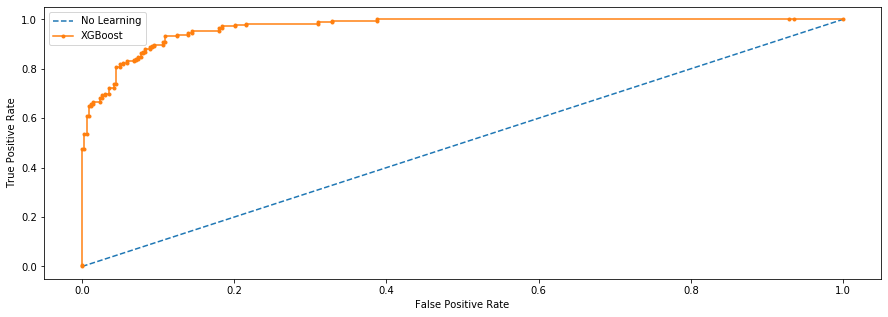

*******************************************************
Accuracy: 90.27%
-------------------------------------------------------
Confusion Matrix
-------------------------------------------------------
[[318  20]
 [ 30 146]]


-------------------------------------------------------
Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       338
           1       0.88      0.83      0.85       176

    accuracy                           0.90       514
   macro avg       0.90      0.89      0.89       514
weighted avg       0.90      0.90      0.90       514

-------------------------------------------------------


In [15]:
print ("Performance --> Train")
performance_fun(results_train.target,results_train.pred_class,results_train.pred_prob)

Performance --> Test
No Learning: ROC AUC=0.500
XGBoost: ROC AUC=0.821


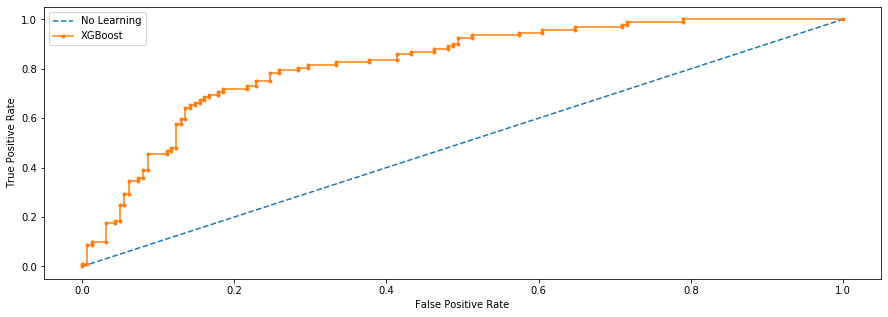

*******************************************************
Accuracy: 77.95%
-------------------------------------------------------
Confusion Matrix
-------------------------------------------------------
[[136  26]
 [ 30  62]]


-------------------------------------------------------
Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       162
           1       0.70      0.67      0.69        92

    accuracy                           0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254

-------------------------------------------------------


In [16]:
print ("Performance --> Test")
performance_fun(results_test.target,results_test.pred_class,results_test.pred_prob)

In [23]:
fp = pd.DataFrame()
fp['column'] = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
fp['score']  = model.feature_importances_

In [26]:
fp.sort_values(by= ['score'])

,column,score
2,BloodPressure,0.076012
3,SkinThickness,0.079221
0,Pregnancies,0.085774
6,DiabetesPedigreeFunction,0.103648
7,Age,0.116960
4,Insulin,0.119916
5,BMI,0.143920
1,Glucose,0.274550
